# Non parametric statistical tests

In this notebook, you will find some statistical tests to test:
* Adequation to a distribution
    * Kolmogorov test
    * $\chi^2$ test
* Adequation to a normal distribution
    * Shapiro-Wilk test
    * Lilliefors test
    * Other methods
* Homogeneity between two samples
    * Wilcoxon-Mann-Whitney test
    * Kolmogorov-Smirnov test
    * $\chi^2$ test
* Independance between two samples
    * $\chi^2$ test

In [1]:
library(nortest) # lilliefors test
library(MASS) # fitdistr
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Load data

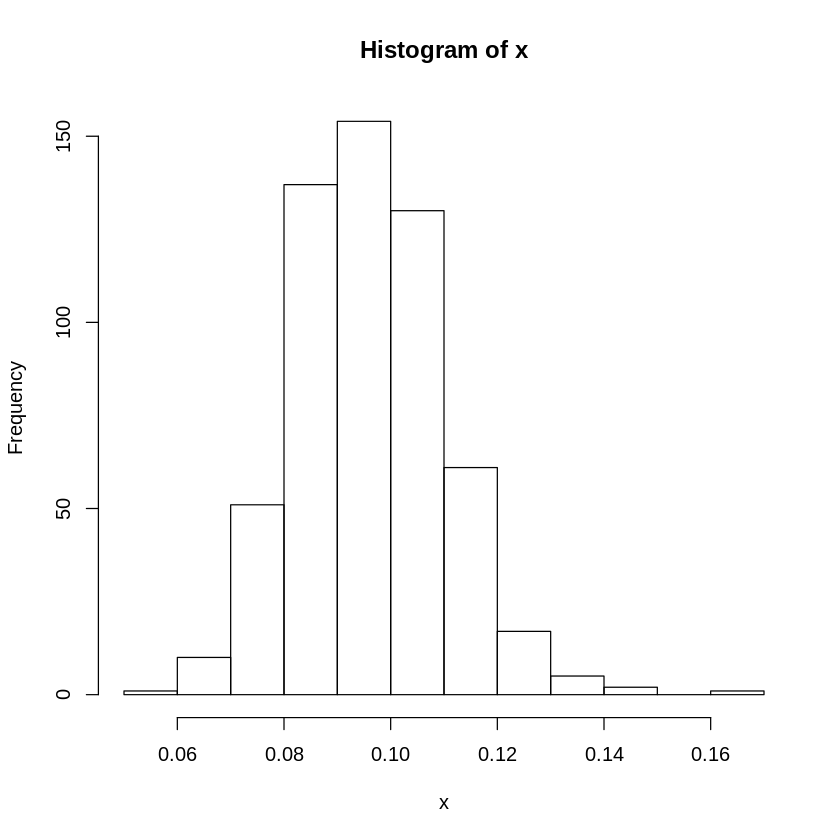

In [2]:
df = read.table("data_all", header=TRUE, sep=",")

#df_norm = as.vector(scale(df, TRUE, TRUE)) if needed

x = df$mean.smoothness
x = x[!is.na(x)]

n = length(x)
p = ncol(df)

hist(x)

## Estimate the distribution parameters

Some statistic tests need an estimation of the distribution parameters

In [3]:
paraw = fitdistr(x, densfun="normal")
logLik(paraw)  # on peut avoir le loglikelihood
print(paraw$estimate)
# on visualise les résultats sur un graphique : histogramme+ loi 

# hist(x,freq=FALSE) # penser à frep=FALSE!!
# lines(dgamma(0:max(x),paraw$estimate[1],paraw$estimate[2]),type='l',col='green',lwd=2);

'log Lik.' 1619.413 (df=2)

      mean         sd 
0.09636028 0.01405176 


# Adequation tests

$$
H_0:L(x)=L_0 \textrm{ against } H_1: L(x)\neq L_0
$$

### Kolmogorov test
* $X$ should be continuous
* Must be preferred when $n$ is large
* Must be used when the law parameters are *a priori* known 

In [4]:
# ks.test(x,"pnorm",mean(x),sd(x))
ks.test(x,"pnorm", paraw$estimate[1], paraw$estimate[2])

Warning message in ks.test(x, "pnorm", paraw$estimate[1], paraw$estimate[2]):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.036094, p-value = 0.4488
alternative hypothesis: two-sided


### $\chi^2$ test
* $X$ sould be discrete

In [5]:
chisq.test(x, p=dpois(1:n,2), rescale.p=TRUE)

Warning message in chisq.test(x, p = dpois(1:n, 2), rescale.p = TRUE):
“Chi-squared approximation may be incorrect”


	Chi-squared test for given probabilities

data:  x
X-squared = Inf, df = 568, p-value < 2.2e-16


# Normality tests

$$
H_0:L(x)=\mathcal{N} \textrm{ against } H_1: L(x)\neq \mathcal{N}
$$

### Shapiro-Wilk test
* Sample should be small $(n<50)$
* More powerfull than Lilliefors and Kolmogorov-Smirnov tests

In [6]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.98749, p-value = 8.601e-05


### Lilliefors test
* It estimates the law parameters from sample

Kolmogorov-Smirnov test in normality case, more powerfull

In [7]:
lillie.test(x)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  x
D = 0.035967, p-value = 0.07646


### Other methods

http://www.biostat.ulg.ac.be/pages/Site_r/Normalite.html

#### Boxplot
Median should be near the mean

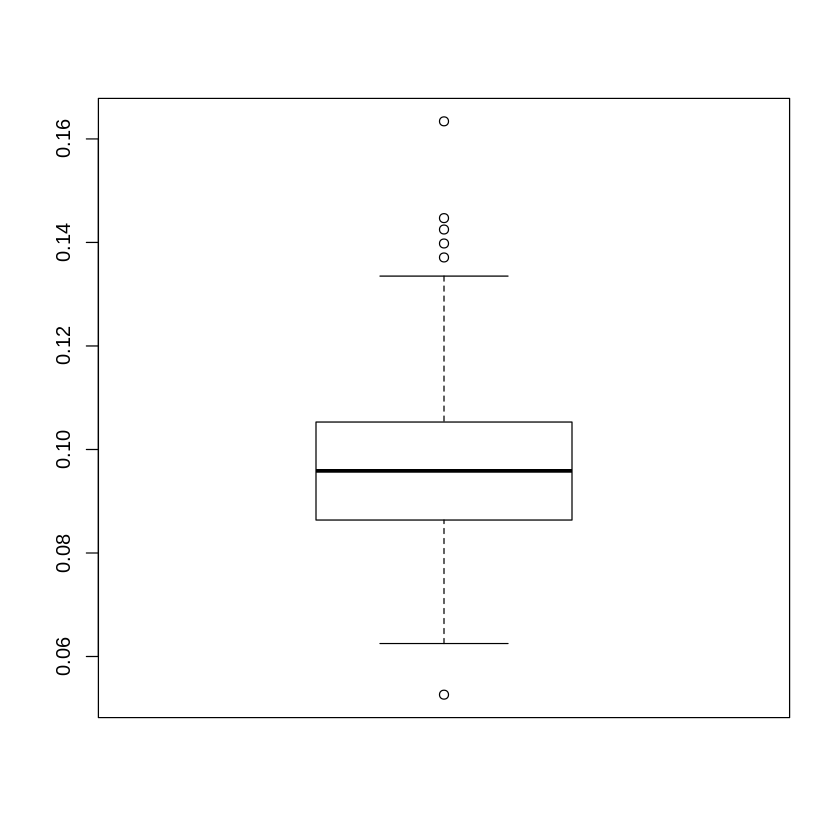

In [8]:
boxplot(x)

#### QQ-plot

Should be a line

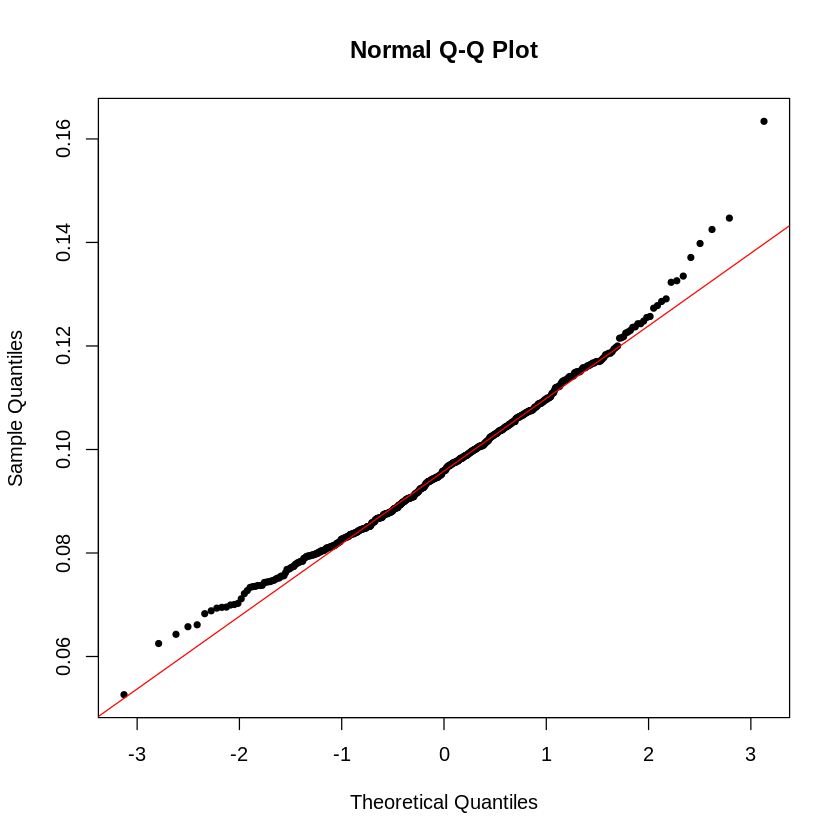

In [9]:
qqnorm(x,pch=20)
qqline(x, col = "red")

#### Repartition function

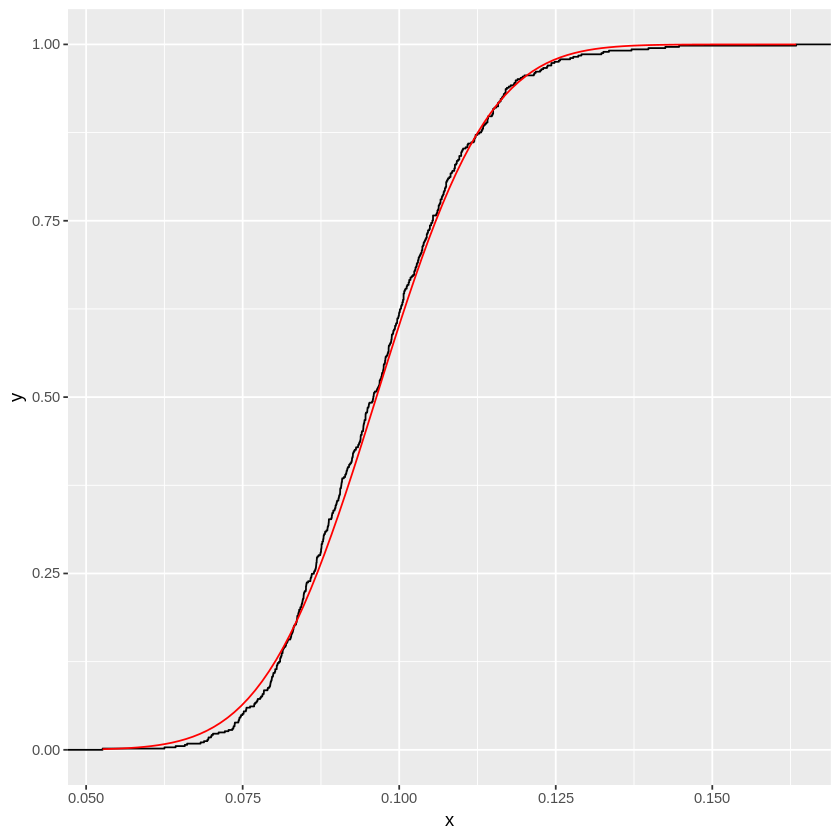

In [10]:
ggplot(data.frame(df=x), aes(x)) + 
      stat_ecdf(geom = "step") +
      stat_function(fun = pnorm, args =list(mean=mean(x),sd=sd(x)), col="red")

#### Skewness value and Kurtosis

Should be near 0

In [11]:
# Skewness
(n/((n-1)*(n-2)))*sum(((x-mean(x))/sd(x))^3)

[1] 0.4563238

In [12]:
# Kurtosis
(n*(n+1))/((n-1)*(n-2)*(n-3)) * sum(((x-mean(x))/sd(x))^4) - 3*((n-1)^2)/((n-2)*(n-3))

[1] 0.8559749

# Homogeneity tests

$$
H_0:F_X=F_Y \textrm{ against } H_1: F_X \neq F_Y
$$

### Wilcoxon-Mann-Whitney test
* Good for small samples
* Powerfull test, but less than Student test 

In [13]:
wilcox.test(x=df$mean.radius, y=df$mean.perimeter, alternative="two.sided")


	Wilcoxon rank sum test with continuity correction

data:  df$mean.radius and df$mean.perimeter
W = 0, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov-Smirnov test

In [14]:
ks.test(x=df$mean.radius, y=df$mean.perimeter)

Warning message in ks.test(x = df$mean.radius, y = df$mean.perimeter):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  df$mean.radius and df$mean.perimeter
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


### $\chi^2$ test

In [15]:
chisq.test(df$radius.error, y=df$mean.fractal.dimension)

Warning message in chisq.test(df$radius.error, y = df$mean.fractal.dimension):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df$radius.error and df$mean.fractal.dimension
X-squared = 268900, df = 268422, p-value = 0.2569


# Independance tests

$$
H_0: \textrm{X and Y independant} \textrm{ against } H_1: \textrm{X and Y not independant}
$$

### $\chi^2$ test

In [16]:
chisq.test(df$radius.error, y=df$mean.fractal.dimension)

Warning message in chisq.test(df$radius.error, y = df$mean.fractal.dimension):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df$radius.error and df$mean.fractal.dimension
X-squared = 268900, df = 268422, p-value = 0.2569
